In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import random as rn
import scipy.signal
import csv
import os

In [ ]:
%load_ext rpy2.ipython

In [ ]:
import rpy2.rinterface

In [252]:
df_stockes = pd.read_csv("stocks_price_final.csv", index_col = 0)
df_SP500 = pd.read_csv("SP500.csv")
symbols = df_SP500['symbol'].tolist()
companies=np.random.choice(symbols, size=500, replace=False)

/Users/dinnymathew/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [222]:
#dfStockes.head()
#dfSP500.head()
#companies
#dfStockes.info()
print(df_stockes.dtypes["market.cap"])

object


In [253]:
#dfStockes.columns = ['symbol','date','open','high','low','close','volume', 'adjusted']
df_stockes.columns = ['symbol','date','open','high','low','close','volume', 'adjusted','market.cap','sector', 'industry', 'exchange']
#dfStockes["market.cap"] = dfStockes["market.cap"] .astype(float)
#Filter by SP500
df_stockes=df_stockes[df_stockes['symbol'].isin(companies)]
#Filter by Market Cap
#df_stockes=df_stockes[df_stockes['market.cap'] > 2000000000]
df_stockes['symbol'] = df_stockes['symbol']

In [224]:
df_stockes.head()


,symbol,date,open,high,low,close,volume,adjusted,market.cap,sector,industry,exchange
6893,ABMD,2019-01-02,315.940002,320.709991,307.029999,309.959991,590000.0,309.959991,$13.39B,Health Care,Medical/Dental Instruments,NASDAQ
6894,ABMD,2019-01-03,307.250000,311.739990,293.660004,302.290009,665300.0,302.290009,$13.39B,Health Care,Medical/Dental Instruments,NASDAQ
6895,ABMD,2019-01-04,305.309998,321.480011,304.980011,313.440002,624300.0,313.440002,$13.39B,Health Care,Medical/Dental Instruments,NASDAQ
6896,ABMD,2019-01-07,313.500000,315.500000,305.559998,314.799988,710600.0,314.799988,$13.39B,Health Care,Medical/Dental Instruments,NASDAQ
6897,ABMD,2019-01-08,318.450012,323.100006,312.220001,318.420013,570700.0,318.420013,$13.39B,Health Care,Medical/Dental Instruments,NASDAQ


In [254]:
col_close_price = 'adjusted'
df_stock_prices = df_stockes[['symbol','date', col_close_price]]
df_stock_prices = df_stock_prices.drop_duplicates( keep='last')
df_stock_prices['date'] = pd.to_datetime(df_stock_prices['date'], format='%Y%m%d', errors='ignore')
df_stock_prices.set_index(['date','symbol'],inplace=True)
df_stock_prices=df_stock_prices.unstack()[col_close_price]
df_stock_prices.reset_index(inplace=True)
df_stock_prices.fillna(method='bfill',inplace=True)
df_stock_prices.fillna(method='ffill',inplace=True)
df_stock_prices.dropna(inplace = True)

In [226]:
df_stock_prices.head()

symbol,date,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,...,XEL,XLNX,XOM,XRX,XYL,YUM,ZBH,ZBRA,ZION,ZTS
0,2019-01-02,64.832542,31.963160,156.691010,154.794983,79.937981,72.355934,309.959991,67.529343,137.180054,...,46.331181,84.908691,64.316460,18.966738,65.213387,89.070412,101.069786,156.240005,39.697353,83.571335
1,2019-01-03,62.444126,29.581665,161.582657,139.376251,77.304138,71.306305,302.290009,64.342346,132.496475,...,46.148624,81.711800,63.328960,18.552164,62.977840,86.829994,99.241661,146.880005,39.477768,80.682732
2,2019-01-04,64.605537,31.530161,157.574066,145.326126,79.794632,72.132393,313.440002,66.178749,137.648422,...,46.600212,85.495285,65.663887,19.268248,65.634995,89.089882,102.631088,152.970001,40.690266,83.848312
3,2019-01-07,65.977386,32.425678,159.885956,145.002686,80.959251,72.647491,314.799988,67.169830,138.126541,...,46.398445,87.753654,66.005356,19.682819,64.664299,88.992477,102.670616,155.289993,40.852573,84.352829
4,2019-01-08,66.944603,31.904110,158.774658,147.766861,81.335533,73.424988,318.420013,66.363365,141.619720,...,46.936501,86.081886,66.485252,20.332949,65.272209,88.817146,100.368179,156.330002,41.224911,85.609169


In [227]:
df_stock_prices['AAPL']

0      154.794983
1      139.376251
2      145.326126
3      145.002686
4      147.766861
          ...    
387    386.089996
388    385.309998
389    393.429993
390    388.000000
391    389.089996
Name: AAPL, Length: 392, dtype: float64

In [228]:
df_stock_prices['AAPL'].shift(3)

0             NaN
1             NaN
2             NaN
3      154.794983
4      139.376251
          ...    
387    381.910004
388    388.230011
389    390.899994
390    386.089996
391    385.309998
Name: AAPL, Length: 392, dtype: float64

In [229]:
np.log(df_stock_prices['AAPL']) - np.log(df_stock_prices['AAPL'].shift(3))

0           NaN
1           NaN
2           NaN
3     -0.065349
4      0.058459
         ...   
387    0.010886
388   -0.007550
389    0.006451
390    0.004935
391    0.009762
Name: AAPL, Length: 392, dtype: float64

In [255]:
T = 1 #Daily return
for key in df_stock_prices.columns:
    try:
        df_stock_prices[key] = np.log(df_stock_prices[key]) - np.log(df_stock_prices[key].shift(T))
    except:
        print (key)
df_stock_prices.set_index('date',inplace=True)

date


/Users/dinnymathew/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [231]:
df_stock_prices.head()
#dfStockPrices.columns
df_stock_prices.loc['20190101':'20190131']['AAPL']

Series([], Name: AAPL, dtype: float64)

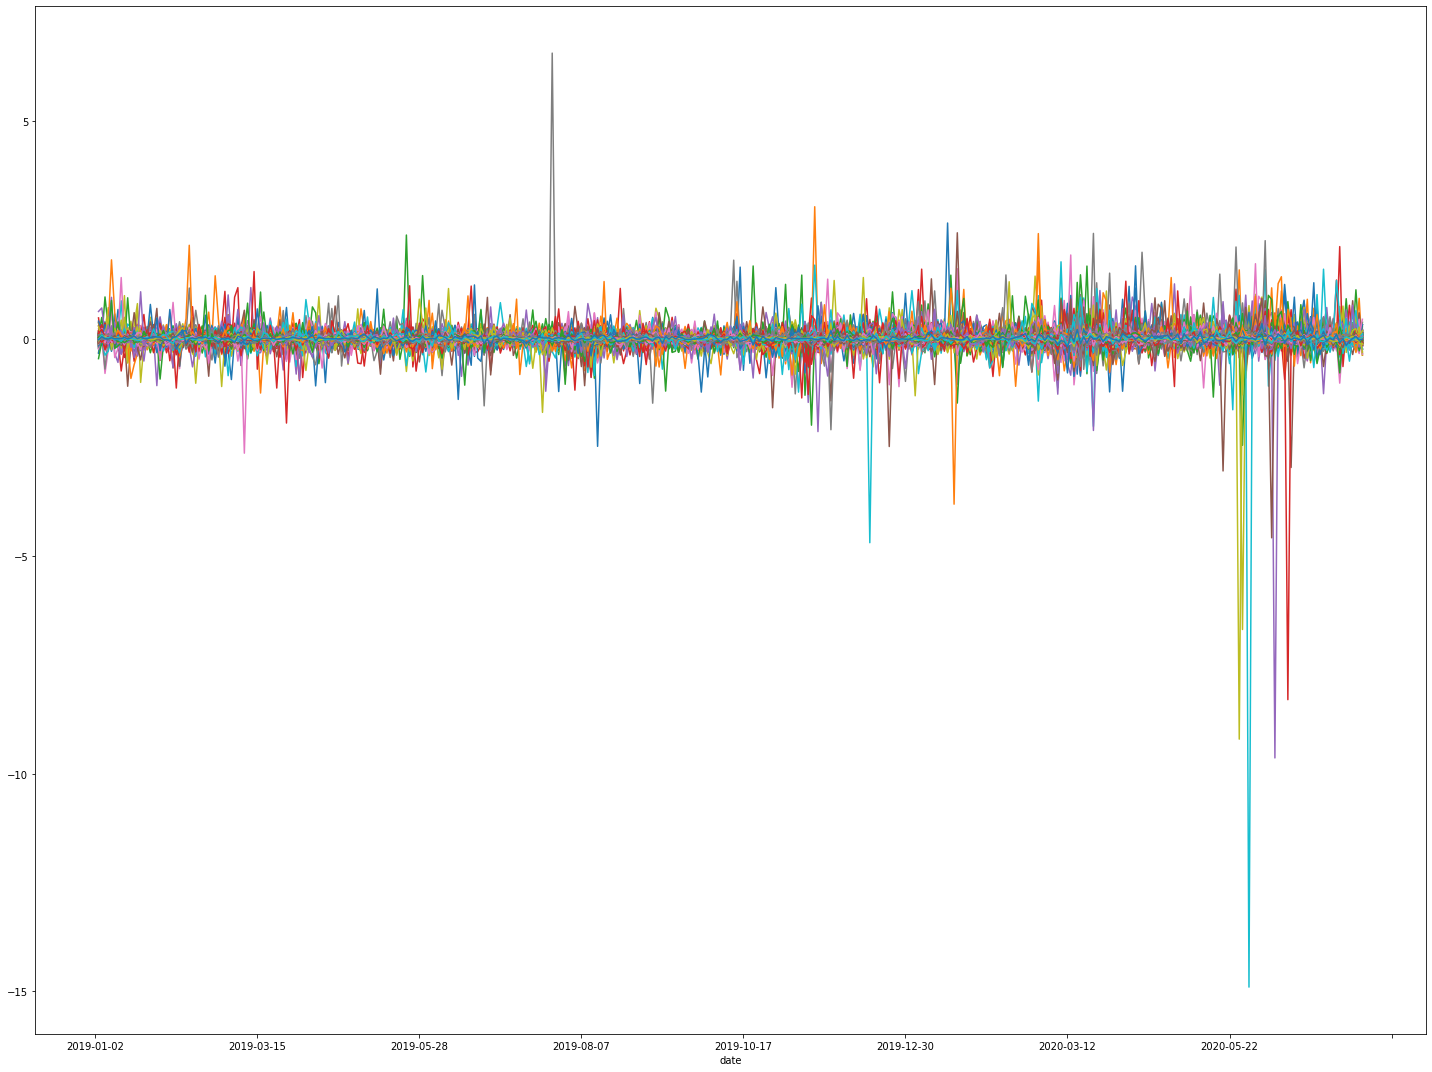

In [256]:
fig, ax1 = plt.subplots(figsize=(20, 15))
df_stock_prices.plot(ax=ax1, legend=False)
plt.tight_layout()
plt.show()

In [ ]:
%matplotlib inline
stocks_cross_corr_dict = {}
#Time Window width
#TO DO: try different windows and differnt algorithms
#t= 21 #21 based on the paper Asset trees and asset graphs in financial markets J.-P. Onnela et all
# Try window from 1 month to 6 months of trading days
# 21 days is one month trading days
start = 5
end = 130
step = 5;
plt.figure(figsize=(20, 10))
for t in range(start, end, step):
    x_days = []
    y_mean_corr = []
    W = t
    for i in range(T,len(df_stock_prices), W):
        dkey = i
        stocks_cross_corr_dict[dkey]=df_stock_prices.iloc[i:(i+W)].corr(method='pearson')
        stocks_cross_corr_dict[dkey].fillna(0,inplace=True)
        x_days.append(dkey)
        y_mean_corr.append(np.mean([abs(j) for j in stocks_cross_corr_dict[dkey].values.flatten().tolist()]))
    plt.plot(x_days, y_mean_corr)
    plt.xlabel('Days')
    plt.ylabel('Mean Correlation')
    plt.legend(list(range(start, end, step)), loc='center left', bbox_to_anchor=(1, 0.5),ncol=1)     

plt.show()
    

In [63]:
%%R -i W -i df_stock_prices 
#head(stocks_cross_corr)
W
head(df_stock_prices)



2019-01-02          NaN          NaN   NaN          NaN          NaN
2019-01-03 -0.040396372 -0.009732581     0  0.009273628  0.018458006
2019-01-04  0.033347320  0.029392535     0 -0.003081618 -0.020456009
2019-01-07  0.005131506  0.007097308     0 -0.024368666  0.004655812
2019-01-08  0.001917546  0.036569746     0  0.114051257  0.040954700
2019-01-09  0.005730675  0.018018453     0  0.020112368 -0.059709436
                    KEQU        KERN           KEX           KEY        KEYS
2019-01-02           NaN         NaN           NaN           NaN         NaN
2019-01-03 -0.0202154504 0.000000000 -0.0202147346  0.0033232092 -0.05179039
2019-01-04  0.0199027310 0.000000000  0.0101584533  0.0332820642  0.06038254
2019-01-07  0.0009379292 0.000000000  0.0128481867  0.0102171308  0.04018252
2019-01-08  0.0155042256 0.002965894  0.0002933685 -0.0006354959  0.01782749
2019-01-09 -0.0108275698 0.000000000  0.0280608954  0.0075997639  0.02139922
                   KFFB         KFRC         K

2019-01-03 -0.026930424 -0.016260548  0.033533788 -0.06478829 -0.013929338
2019-01-04  0.092783713  0.020123981  0.048281983  0.03146769  0.039160681
2019-01-07  0.019240831  0.001926168 -0.031927665  0.03845710  0.002245621
2019-01-08  0.009007684 -0.002569049 -0.007662809  0.04819123  0.007634197
2019-01-09  0.037075723  0.012144625  0.020933277  0.01847018  0.012168349
                     LE         LEA         LEAF         LECO        LEDS
2019-01-02          NaN         NaN          NaN          NaN         NaN
2019-01-03  0.004796172 -0.01922200 -0.001419447 -0.029423537 -0.01413451
2019-01-04  0.038221213  0.03903088  0.111449892  0.035789578  0.03496860
2019-01-07  0.036179657  0.04726751 -0.005095552  0.004558842 -0.01036279
2019-01-08 -0.005727028  0.04664688  0.032666221  0.020508147  0.08961216
2019-01-09  0.037574865  0.03668655 -0.023765972  0.013401914  0.00000000
                    LEE          LEG         LEGH LEGN         LEJU         LEN
2019-01-02          NaN    

2019-01-02         NaN         NaN         NaN        NaN          NaN
2019-01-03  0.04409532 0.021917508  0.02493397 0.01381449 -0.049430584
2019-01-04  0.01556452 0.028644726 -0.03688641 0.04762805  0.047693650
2019-01-07  0.15028220 0.014683307 -0.03207193 0.06062462  0.008869538
2019-01-08 -0.10868831 0.006603622  0.11979290 0.02298952  NaN         NaN           NaN
2019-01-03 -0.02758796  0.04445176 0.008154766    0 -0.03957899 -0.0329949004
2019-01-04  0.09340118 -0.04445176 0.033137364    0  0.02150621  0.0481530537
2019-01-07  0.04666476  0.06595797 0.042267878    0  0.01208474  0.0002089107
2019-01-08  0.03288787  0.09466523 0.013039116    0  0.02666825 -0.0069175459
2019-01-09 -0.00294551  0.13272462 0.001029935    0  0.02882044  0.0318802471
           LVGO          LVS           LW        LWAY         LX         LXFR
2019-01-02  NaN          NaN          NaN         NaN        NaN          NaN
2019-01-03    0 -0.036477009 -0.009274545  0.08701138 0.02659731 -0.017241797
201

2019-01-07  0.02702874  0.001387925  0.029912499  0.05406719 0.009427679
2019-01-08  0.02847933 -0.073361425  0.005876608 -0.01200151 0.029064133
2019-01-09  0.03553813  0.007434978  0.013579258  0.01129941 0.011650617
                   MGA        MGEE        MGEN         MGI         MGIC
2019-01-02         NaN         NaN         NaN         NaN          NaN
2019-01-03 -0.03097737  0.00360242 -0.05505978 -0.01398624  0.001302947
2019-01-04  0.03031875  0.02050737  0.19119195  0.01398624  0.005194878
2019-01-07  0.02021592 -0.01845471  0.11286476  0.06280090  0.010309358
2019-01-08  0.02486583  0.01879026 -0.03542283  0.03838424  0.022814685
2019-01-09  0.02855560 -0.01028250  0.00718566 -0.06929178 -0.011342280
                   MGLN         MGM MGNI         MGNX          MGP         MGPI
2019-01-02          NaN         NaN  NaN          NaN          NaN          NaN
2019-01-03 -0.009905511 -0.01964397    0 -0.004750603  0.020767345 -0.003375678
2019-01-04  0.040438193  0.04240785  

2019-01-09 0.019481136  0.046078612 -0.004008930    0 -0.14089552 -0.00766170
                  MRKR         MRLN        MRNA        MRNS          MRO
2019-01-02         NaN          NaN         NaN         NaN          NaN
2019-01-03 -0.05630626 -0.002569527  0.01102833  0.02606011 -0.006816699
2019-01-04  0.12476222  0.065556488  0.09001755  0.04403227  0.052626146
2019-01-07 -0.02435432 -0.022335958 -0.04153465  0.05971923  0.013535594
2019-01-08  0.02284943 -0.012812834  0.04094497 -0.01754431 -0.009003408
2019-01-09 -0.06534206  0.002492752 -0.03726399  0.04611768  0.037405448
                   MRSN        MRTN        MRTX         MRUS        MRVL
2019-01-02          NaN         NaN         NaN          NaN         NaN
2019-01-03 -0.067171528 -0.02787433 -0.02265102 -0.062024202 -0.04525087
2019-01-04  0.029341958  0.02174683  0.03023696  0.061324657  0.02936779
2019-01-07  0.078744368  0.01645874  0.07057709  0.078049011  0.02252775
2019-01-08  0.097534875  0.03970896  0.0526490

2019-01-04   0  0.004932868  0.02121585  0.052553588 0.017989038  0.006843034
2019-01-07   0  0.002729950  0.02139783  0.002140819 0.138986503  0.008618522
2019-01-08   0 -0.003276846  0.00434921  0.024063641 0.092870998  0.017145183
2019-01-09   0  0.015739755 -0.02765729  0.002895364 0.008957194 -0.006925810
                   NHLD        NHTC            NI         NICE         NICK
2019-01-02          NaN         NaN           NaN          NaN          NaN
2019-01-03 -0.032203140  0.02169517  0.0011959838 -0.017846647  0.000000000
2019-01-04  0.100256604  0.01016789  0.0173779986  0.026048809 -0.017143277
2019-01-07  0.003284075 -0.28414771  0.0054666652 -0.003906301  0.000000000
2019-01-08  0.000000000  0.05427945  0.0185190119  0.004091906 -0.009652585
2019-01-09  0.048009219 -0.02187996 -0.0007648236 -0.012420219  0.000000000
                   NINE         NIO          NIU          NJR          NK
2019-01-02          NaN         NaN          NaN          NaN         NaN
2019-01-

                    NTR        NTRA        NTRP         NTRS         NTUS
2019-01-02          NaN         NaN         NaN          NaN          NaN
2019-01-03 -0.026504752 -0.06789034  0.02384219 -0.026035047 -0.026159301
2019-01-04  0.045136891  0.04682050  0.01041676  0.034329030  0.040035934
2019-01-07  0.012859948  0.01720136  0.03061464  0.002592374  0.001795810
2019-01-08  0.030327137 -0.11836460  0.01248456 -0.007560378  0.001494188
2019-01-09  0.004055858 -0.01052641 -0.02767472  0.008971708  0.014525170
                  NTWK         NTZ         NUAN          NUE       NURO
2019-01-02         NaN         NaN          NaN          NaN        NaN
2019-01-03 -0.03226086  0.05715841 -0.005974706 -0.017583330 0.02381065
2019-01-04  0.06658560 -0.03390155  0.043246063  0.048140140 0.01169604
2019-01-07  0.05809526  0.05588046  0.038696393 -0.007645775 0.00000000
2019-01-08 -0.01164496  0.03208831  0.013027253  0.033864084 0.08894749
2019-01-09  0.05553028  0.03109059  0.000000000  0

2019-01-04   0  0.008399703 0.014090798  0.0436350131 0.05915295  0.01967277
2019-01-07   0 -0.005160494 0.003705298 -0.0033765847 0.06347942  0.03195160
2019-01-08   0  0.018200980 0.029710820  0.0162151710 0.03930045  0.01250016
2019-01-09   0 -0.015746441 0.007154572 -0.0005549059 0.02493568  0.00619197
                  OIS          OKE         OKTA         OLED          OLLI
2019-01-02        NaN          NaN          NaN          NaN           NaN
2019-01-03 0.01435119 -0.002392136 -0.060268962 -0.139252006 -0.0007550472
2019-01-04 0.06579259  0.042736299  0.058528656  0.046319374  0.0450427274
2019-01-07 0.04273642  0.017324666  0.048224380  0.017895972  0.0687714270
2019-01-08 0.01728159  0.021114842  0.038918946  0.030968677  0.0210759032
2019-01-09 0.04522121  0.014502736 -0.001743217  0.006285336  0.0010553299
                   OLN         OLP        OMAB          OMC        OMCL
2019-01-02         NaN         NaN         NaN          NaN         NaN
2019-01-03 -0.02844718 

2019-01-02         NaN         NaN        NaN          NaN          NaN  NaN
2019-01-03 0.011637632  0.02500130 0.02358420 -0.025529700 -0.012333691    0
2019-01-04 0.029318034 -0.01242252 0.01270096  0.039617371  0.031661880    0
2019-01-07 0.007993642  0.22314355 0.01838963  0.013222007  0.019892606    0
2019-01-08 0.020489303  0.04879016 0.02944557  0.033736206  0.007878269    0
2019-01-09 0.012403245 -0.05380271 0.03886679 -0.009112251  0.012082391    0
                  OZK        PAA         PAAS           PAC         PACB
2019-01-02        NaN        NaN          NaN           NaN          NaN
2019-01-03 0.01921091 0.03534275 0.0115450720 -0.0203017039 -0.014976454
2019-01-04 0.03367596 0.05877369 0.0100772990  0.0411261032  0.000000000
2019-01-07 0.02103638 0.03007410 0.0106383867  0.0140262932 -0.002747254
2019-01-08 0.01509771 0.02250155 0.0006612569  0.0281424172  0.013661415
2019-01-09 0.02106976 0.01002498 0.0209294512 -0.0003330287 -0.008174432
                  PACD     

2019-01-09  0.0093617795  0.03836087  0.01270212 -0.0059964424  0.000000000
                   PFSW           PG           PGC        PGEN PGNY
2019-01-02          NaN          NaN           NaN         NaN  NaN
2019-01-03  0.038533664 -0.007036076  0.0003894105 -0.02981058    0
2019-01-04  0.056776516  0.020204812  0.0208099748  0.04507805    0
2019-01-09   0 0.9509763 -0.004883886  0.00500320   0  0.003019630  0.060477919
                   PII         PINC PINE PING PINS         PIPR        PIRS
2019-01-02         NaN          NaN  NaN  NaN  NaN          NaN         NaN
2019-01-03 -0.04372409 -0.014895305    0    0    0 -0.020102145 -0.10080470
2019-01-04  0.05125299  0.026653805    0    0    0  0.042445144  0.04445176
2019-01-07 -0.01202221 -0.007466648    0    0    0  0.004671599  0.05635294
2019-01-08  0.04478758 -0.002143677    0    0    0 -0.001311752 -0.02777956
2019-01-09  0.03112939  0.040221008    0    0    0  0.014622114  0.01398624
                  PIXY         PJT      

2019-01-04 -0.011128185  0.015504228  0.01360565 0.019333913   0    0
2019-01-07 -0.002801480  0.003072012  0.07796154 0.013445023   0    0
2019-01-08  0.017795278  0.023644776  0.00000000 0.011014108   0    0
2019-01-09 -0.006989377 -0.007668783  0.00000000 0.008181605   0    0
                   PSO        PSTG        PSTI PSTL        PSTV PSTX
2019-01-02         NaN         NaN         NaN  NaN         NaN  NaN
2019-01-03 0.002522165 -0.06157724  0.06524052    0  0.00000000    0
2019-01-04 0.025695434  0.02052670  0.09051401    0  0.00000000    0
2019-01-07 0.012200351  0.03738753  0.03774033    0 -0.03174870    0
2019-01-08 0.035732191  0.05009998 -0.01869213    0  0.06252036    0
2019-01-09 0.017015042  0.01386498  0.05505978    0  0.00000000    0
                   PSV           PSX        PSXP           PT PTAC         PTC
2019-01-02         NaN           NaN         NaN          NaN  NaN         NaN
2019-01-03  0.03850985 -0.0139414494 0.016253028  0.001988072    0 -0.04698508


2019-01-03  0.10343559  0.001407072 -0.0241257231 -0.0009671064 -0.019481136
2019-01-04  0.07245508  0.003684641  0.0264298716  0.0662118322  0.101253734
2019-01-07 -0.02173999  0.009759570  0.0003835091 -0.0023168134  0.004434597
2019-01-08 -0.02222314  0.020937734  0.0182375499  0.0015871345 -0.130585882
2019-01-09  0.04396312 -0.001189491 -0.0049065583  0.0058229596 -0.044680971
                   RELL        RELV         RELX        RENN        REPH
2019-01-02          NaN         NaN          NaN         NaN         NaN
2019-01-03 -0.005763716  0.00000000 -0.011249752 -0.02033968  0.02136252
2019-01-04 -0.003474243  0.01626052  0.024776662  0.01360565  0.01572782
2019-01-07 -0.005817364  0.04944828  0.008124156 -0.02739897  0.06299318
2019-01-08 -0.044133538  0.01090523  0.010416861  0.03413301 -0.03100073
2019-01-09  0.018127292 -0.02860481 -0.009940922  0.06495790  0.20898313
2019-01-08 -0.068732929 -0.025270402 0.01455330  0.01929320  0.00205976
2019-01-09  0.001460921  0.02619

2019-01-07  0.02197891  0.041206289  0.01098889  0.053367252 0.026210213
2019-01-08 -0.01564977  0.028926501 -0.01098889 -0.002524048 0.039358049
2019-01-09  0.03715598 -0.013195694  0.01098889  0.005428513 0.003424676
                   RPAY          RPD RPLA         RPM RPRX          RPT RPTX
2019-01-02          NaN          NaN  NaN         NaN  NaN          NaN  NaN
2019-01-03  0.000000000 -0.051513534    0 -0.04976149    0  0.000000000    0
2019-01-04  0.000000000  0.063669826    0 -0.04891778    0  0.013582508    0
2019-01-07 -0.002032521  0.077961510    0  0.01046936    0  0.028264674    0
2019-01-08  0.002032521  0.031555665    0  0.03516314    0  0.037011410    0
2019-01-09  0.000000000  0.007382146    0  0.01054743    0 -0.003164505    0
           RRBI          RRC         RRD       RRGB         RRR           RS
2019-01-02  NaN          NaN         NaN        NaN         NaN          NaN
2019-01-03    0 -0.001004681 -0.05536894 0.01593515 -0.00187095 -0.025357349
2019-01-04 

                    SBSI         SBT          SBUX          SC        SCCO
2019-01-02           NaN         NaN           NaN         NaN         NaN
2019-01-03 -0.0009348067  0.00832188 -0.0443458388 0.005577267 -0.03299966
2019-01-04  0.0322064544  0.07578374  0.0326168537 0.046191407  0.06398206
2019-01-07  0.0063187032 -0.05392493  0.0000000000 0.002122020  0.00576368
2019-01-08  0.0128149194  0.02139120  0.0007861729 0.006865601  0.01269056
2019-01-09  0.0064935133  0.01052635  0.0040785102 0.000000000  0.00628539
                   SCHL        SCHN         SCHW          SCI        SCKT
2019-01-02          NaN         NaN          NaN          NaN         NaN
2019-01-03 -0.019576961 -0.02687834 -0.020899841 -0.017094414 -0.01916992
2019-01-04  0.019576961  0.05438829  0.041371831  0.020329394  0.03797925
2019-01-07 -0.006400779  0.01149950  0.007043913  0.003719765  0.15503760
2019-01-08  0.005909631  0.01614017  0.012555453  0.028067738  0.07676402
2019-01-09  0.026170909  0.0188

2019-01-07 -0.007117468  0.014012530    0   0  0.003507896  0.02437581
2019-01-08 -0.007168489  0.007071337    0   0  0.006979041 -0.04008294
2019-01-09  0.003590668 -0.001631260    0   0  0.046113534 -0.01061018
                    SID          SIEB          SIEN         SIFY          SIG
2019-01-02          NaN           NaN           NaN          NaN          NaN
2019-01-03 -0.004124049 -0.0727994996 -0.0007334067 -0.027399297 -0.017694071
2019-01-04  0.071744126  0.0007624857  0.0224891596  0.034133238  0.064942372
2019-01-07 -0.011605650  0.0173786013  0.0177750858  0.000000000  0.008615856
2019-01-08  0.003883812 -0.0265670274  0.0174646423  0.064957678  0.027081934
2019-01-09  0.034288966  0.0000000000  0.0266500227  0.006270162  0.029885942
                  SIGA         SIGI         SII         SILC SILK         SIMO
2019-01-02         NaN          NaN         NaN          NaN  NaN          NaN
2019-01-03 -0.02805795 -0.003374951  0.00000000 -0.032045871    0 -0.048315653
2019

                  SNFCA        SNGX          SNN        SNOA          SNP
2019-01-02          NaN         NaN          NaN         NaN          NaN
2019-01-03  0.019011960 -0.01047130 -0.024754593 -0.09531018 -0.002657986
2019-01-04  0.001881506  0.02083409  0.033779597  0.01418463  0.018458591
2019-01-07 -0.013245293 -0.01036279 -0.011776116  0.02777956  0.007534771
2019-01-08  0.020735917  0.05077233  0.007683966  0.00000000  0.021602100
2019-01-09  0.011131868 -0.04040954  0.011146017 -0.02777956  0.034008331
                   SNPS          SNR        SNSS          SNV          SNX
2019-01-02          NaN          NaN         NaN          NaN          NaN
2019-01-03 -0.035605625  0.016451490 -0.04652002 -0.007987860 -0.037152960
2019-01-04  0.033819367 -0.004672873  0.04652002  0.018640685  0.046351400
2019-01-07  0.021927083  0.050239042  0.24116206  0.006036854  0.013460542
2019-01-08  0.003956668  0.030704198 -0.09352606  0.024376950  0.004686685
2019-01-09  0.009938843 -0.00432

2019-01-02          NaN          NaN         NaN          NaN          NaN
2019-01-03 -0.010062098  0.059014171 -0.03905729 -0.030382084 -0.045462374
2019-01-04  0.033633919  0.017045867  0.01893802  0.059868249  0.006622541
2019-01-07 -0.004901478  0.052138008 -0.08478742  0.016807118  0.016366977
2019-01-08  0.003174125 -0.002677378 -0.03638860 -0.007168489 -0.026317308
2019-01-09 -0.006358328  0.018592833  0.02153129 -0.012062872  0.026317308
                    STL         STLD         STM        STMP         STN
2019-01-02          NaN          NaN         NaN         NaN         NaN
2019-01-03 -0.011339982 -0.016222675 -0.12958824 -0.01808244 -0.01134568
2019-01-04  0.026067790  0.051393373  0.04297381  0.04441357  0.01988315
2019-01-07 -0.000584813  0.010408592  0.03815185  0.04351540  0.02387383
2019-01-08  0.009898098  0.032718943  0.00305113  0.00278128  0.01388310
2019-01-09  0.000000000  0.005149069  0.05626948  0.03027400  0.01623952
                   STND         STNE   

2019-01-03 -0.033627857 -0.01185572 -0.033522715 0.004005296 -0.02309914
2019-01-04  0.029276881  0.06810105  0.065740838 0.022833026  0.05730265
2019-01-07 -0.001335102  0.06153770  0.027839036 0.028249354  0.02182664
2019-01-08 -0.006702377  0.01606075  0.232267629 0.040526441  0.01022852
2019-01-09  0.005031015  0.03559750  0.006009032 0.009478800  0.02346739
                  TCON          TCP TCRR          TCS          TCX           TD
2019-01-02         NaN          NaN  NaN          NaN          NaN          NaN
2019-01-03 -0.03564169 -0.006657115    0 -0.004048664 -0.027394398 -0.005786732
2019-01-04  0.07140892  0.074448605    0  0.037815517  0.032161416  0.015685856
2019-01-07  0.10265415 -0.029969172    0  0.049533840  0.020773191  0.002950659
2019-01-08  0.00000000  0.021370181    0  0.031109741  0.002085857  0.003920823
2019-01-09  0.01212136  0.006530136    0 -0.001803460  0.012741055  0.019083621
                   TDAC          TDC          TDG        TDOC         TDS
2

2019-01-04  0.029500664  0.062842198  0.041444079  0.0303309522  0.0363361773
2019-01-07  0.007722046 -0.023325648  0.028253792  0.0262095284  0.0243402700
2019-01-08 -0.017459221  0.046455962  0.029169926  0.0465934339  0.0074349785
2019-01-09  0.032726694 -0.007763717  0.001689665 -0.0007719177  0.0363676442
                   TPIC          TPL         TPR         TPRE TPTX         TPX
2019-01-02          NaN          NaN         NaN          NaN  NaN         NaN
2019-01-03 -0.019018006  0.002856535 -0.04123381 -0.046022032    0 -0.02191539
2019-01-04  0.048409139  0.041659691  0.03715687  0.050197404    0  0.02737921
2019-01-07  0.018127347  0.045898745  0.00987238  0.007265211    0  0.04810180
2019-01-08  0.007457194  0.012169431  0.02313389  0.008238976    0  0.06002673
2019-01-09  0.023858720 -0.028579813  0.04364133  0.033285978    0  0.01582145
                    TR          TRC        TRCH        TREC        TREE
2019-01-02         NaN          NaN         NaN         NaN    

2019-01-04  0.016209771  0.03493805  0.0162544461  0.052790034  0.02236269
2019-01-07 -0.003717325  0.01786521 -0.0074250095 -0.006788892  0.03602077
2019-01-08 -0.003108543  0.03480053  0.0001910428  0.018893949  0.04526577
2019-01-09  0.014833304  0.01455159 -0.0084420972  0.027687992  0.03084703
                  ULTA         UMBF          UMC         UMH        UMPQ
2019-01-02         NaN          NaN          NaN         NaN         NaN
2019-01-03 -0.01876594 -0.009249487 -0.022858711 0.019081305 0.003059089
2019-01-04  0.04683935  0.028922343 -0.005796628 0.030459090 0.028900071
2019-01-07  0.06073764  0.004582414  0.028655339 0.018167457 0.024041154
2019-01-08  0.01828204  0.007382393  0.000000000 0.025051696 0.020643071
2019-01-09  0.01862974  0.001251263  0.000000000 0.001594934 0.012408457
                  UMRX            UN        UNAM          UNB          UNF
2019-01-02         NaN           NaN         NaN          NaN          NaN
2019-01-03  0.00000000 -0.0052492828  0

                 VLRS          VLY          VMC VMD          VMI         VMW
2019-01-02        NaN          NaN          NaN NaN          NaN         NaN
2019-01-03 0.03133897 -0.005540188 -0.010299742   0 -0.013297116 -0.04115565
2019-01-04 0.06158498  0.036010415  0.049879196   0  0.024811147  0.06115122
2019-01-07 0.06762675  0.021209843  0.019700206   0  0.011206077  0.03417988
2019-01-08 0.01739174  0.015617202 -0.003967306   0  0.011693962  0.02106499
2019-01-09 0.04445176  0.019437996  0.002711108   0  0.002706162  0.02382823
                   VNCE        VNDA         VNE         VNET          VNO
2019-01-02          NaN         NaN         NaN          NaN          NaN
2019-01-03 -0.029823284 -0.03809625 -0.03135053  0.004667453 -0.002654249
2019-01-04  0.008040244  0.06475476  0.06374207  0.033202821  0.016638250
2019-01-07  0.075179899  0.03366132  0.05427689 -0.002254792  0.018934060
2019-01-08  0.014746811  0.01074344  0.07591227  0.059162925  0.025950843
2019-01-09  0.030

2019-01-02          NaN          NaN         NaN          NaN          NaN
2019-01-03 -0.033615272 -0.004291959 0.004836149 -0.021201304 -0.002708828
2019-01-04  0.064413981  0.004291959 0.082872751  0.026664695  0.026213170
2019-01-07  0.005161217  0.006828855 0.073155907  0.007348366  0.002419300
2019-01-08  0.063572727  0.008049314 0.019692258  0.006377644  0.014068429
2019-01-09  0.011209199  0.000000000 0.051973675 -0.006047887 -0.005102903
                   WMB         WMC WMG         WMGI          WMK          WMS
2019-01-02         NaN         NaN NaN          NaN          NaN          NaN
2019-01-03 0.008438873 0.011627916   0 -0.006344489 -0.020510189 -0.002067382
2019-01-04 0.040733546 0.036326511   0  0.039278384  0.031748665  0.018048250
2019-01-07 0.025158602 0.015486922   0  0.002875631 -0.004563366  0.028057863
2019-01-08 0.029377810 0.002193109   0  0.020252921 -0.007093668  0.021893039
2019-01-09 0.011195729 0.003280425   0  0.017434193  0.011657034  0.003088774
    

2019-01-08  0.002409225  0.007978464 -0.020863098 0.06016852 -0.01945243
2019-01-09  0.023442588 -0.007337670  0.013263740 0.05214451  0.02032770
                 YTEN        YTRA           YUM        YUMC         YVR
2019-01-02        NaN         NaN           NaN         NaN         NaN
2019-01-03 0.12210270 -0.02392459 -0.0254750880 -0.03994578  0.00000000
2019-01-04 0.21622316  0.04729014  0.0256936553  0.02789223  0.01488861
2019-01-07 0.03636760  0.02733655 -0.0010939322  0.01146887  0.01467019
2019-01-08 0.04367506  0.06944221 -0.0019721211 -0.01829483 -0.01960847
2019-01-09 0.00000000  0.04709161 -0.0004388742  0.02934467  0.10337835
                     YY            Z          ZAGG           ZBH         ZBRA
2019-01-02          NaN          NaN           NaN           NaN          NaN
2019-01-03 -0.034506107 -0.014269364 -0.0572733101 -0.0182533329 -0.061777358
2019-01-04  0.060298502  0.028987504  0.0689239274  0.0335829929  0.040625869
2019-01-07  0.031753595  0.001622093  

In [176]:
stocks_cross_corr

{1: symbol         A        AA      AACG       AAL      AAME       AAN      AAOI  \
 symbol                                                                         
 A       1.000000  0.539532  0.167778  0.584572  0.093124  0.609468  0.877516   
 AA      0.539532  1.000000  0.202864  0.303012  0.210408  0.322955  0.429036   
 AACG    0.167778  0.202864  1.000000  0.041820  0.030381  0.045077  0.217513   
 AAL     0.584572  0.303012  0.041820  1.000000  0.300100  0.699804  0.516619   
 AAME    0.093124  0.210408  0.030381  0.300100  1.000000  0.314196  0.168091   
 ...          ...       ...       ...       ...       ...       ...       ...   
 ZUO     0.718807  0.399989  0.096126  0.490417  0.035971  0.528130  0.654533   
 ZVO     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
 ZYME    0.722339  0.482369 -0.006124  0.401743 -0.003251  0.523186  0.549497   
 ZYNE    0.282539  0.332367  0.383455  0.239954  0.195666  0.007053  0.220687   
 ZYXI    0.524630  0.3961